# Let's make this a new visualization notebook

In [1]:
from plotly3d.plot import scatter, trajectories
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler


In [2]:
# Here we retrieve the mean and std vals from the original embeddings
RESULTS_DIR = os.path.join('../../results')
data_name = 'scRNAseq'
SAVE_PATH = os.path.join(RESULTS_DIR, data_name)


trajectoriespts = np.load(os.path.join(SAVE_PATH,'trajectories.npy'))
generated = np.load(os.path.join(SAVE_PATH,'generated.npy'))
normalize = np.load(os.path.join(SAVE_PATH, 'normalize.npz'),allow_pickle=True)
std_vals = normalize['std']
mean_vals = normalize['mean']


true_data = pd.read_csv(os.path.join(SAVE_PATH,'true_data.csv'),index_col=0)
df_samples = pd.read_csv(os.path.join(SAVE_PATH,'df_samples.csv'),index_col=0)

In [3]:
scaler = MinMaxScaler()
scaler.fit(true_data)
trajectories(
    trajectoriespts,
    fig=scatter(
        true_data.values, 
        df_samples['samples'].values,
        scaler=scaler,
        # rescale=False,
        s=5,
        alpha=1,
    ), 
    scaler=scaler,
    s=1,
    # rescale=False,
    filename=os.path.join(SAVE_PATH, 'trajectories.html'),
    title='',
)

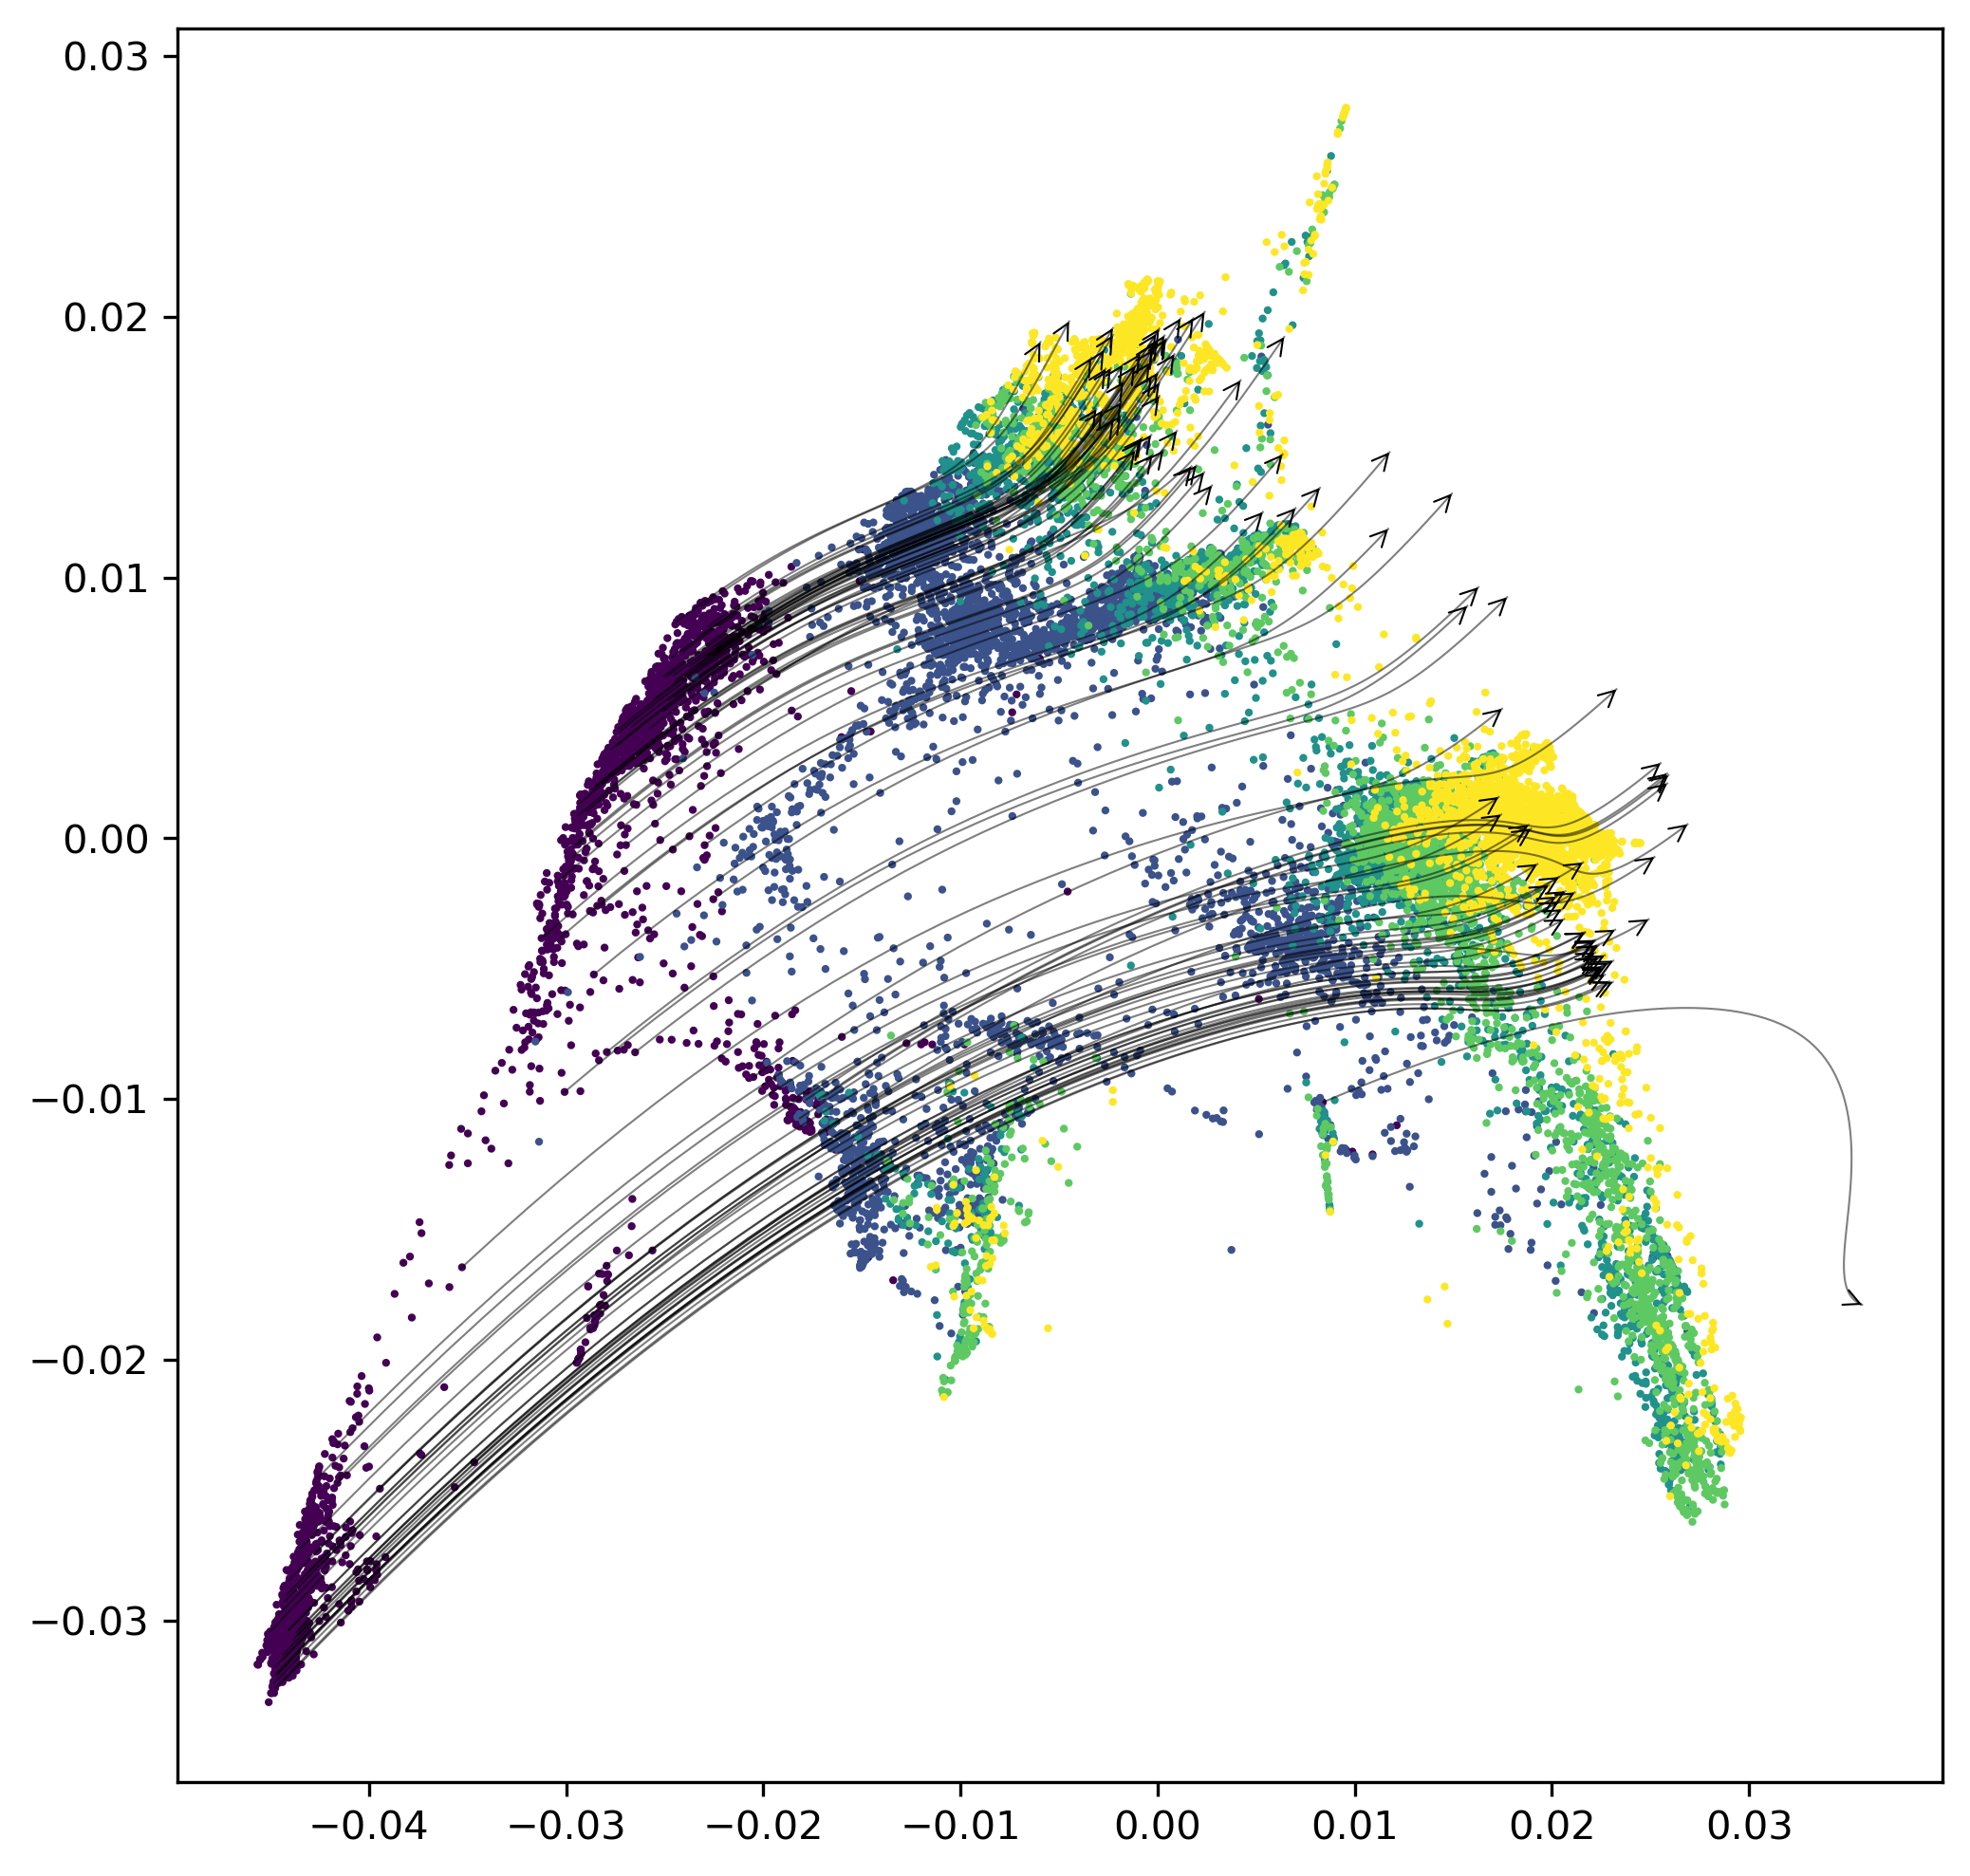

In [5]:
fig = plt.figure(figsize=(8, 8), dpi=300)
plt.scatter(true_data.values[:, 0], true_data.values[:, 1], c=df_samples['samples'].values, cmap='viridis', s=1)
for i,traj in enumerate(np.transpose(trajectoriespts, axes=(1,0,2))):
    # widths = m_traj[:,i]
    plt.plot(traj[:, 0], traj[:, 1], alpha=.5, linewidth=.5, color='Black');
    plt.annotate('', xy=(traj[-1, 0], traj[-1, 1]), xytext=(traj[-2, 0], traj[-2, 1]),
                 arrowprops=dict(arrowstyle='->', color='Black', lw=.5, mutation_scale=10))


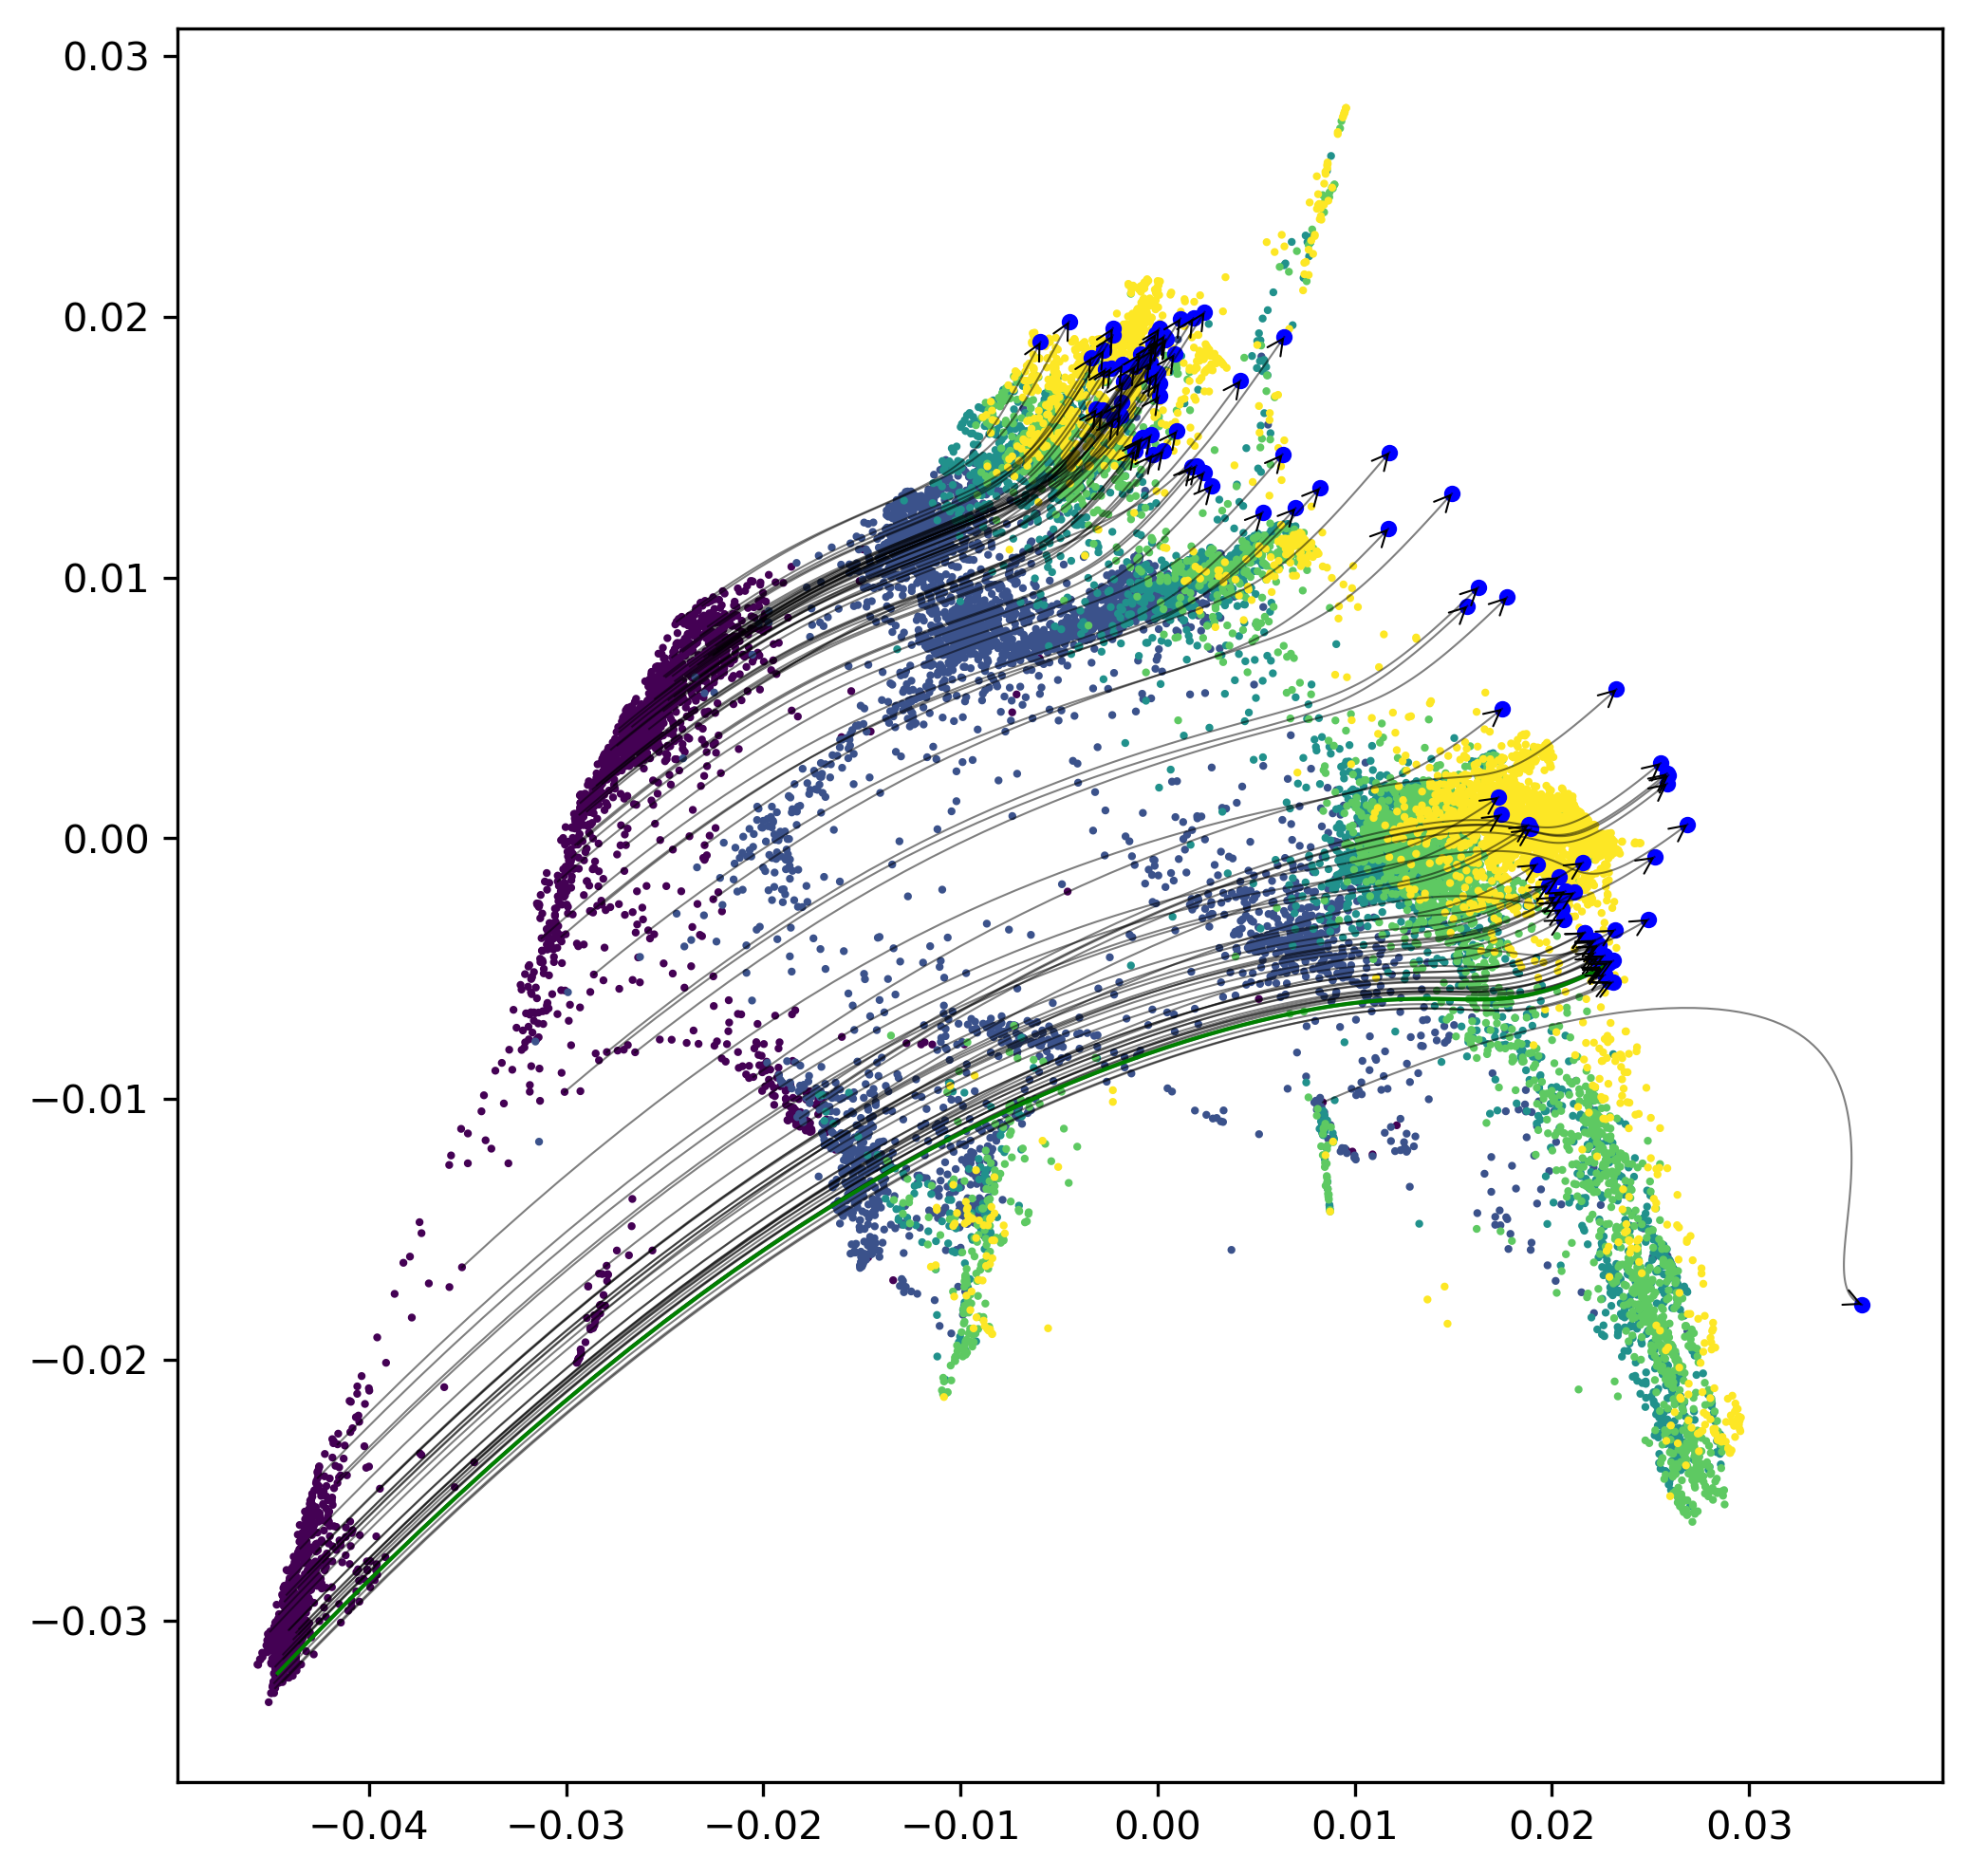

In [6]:
fig = plt.figure(figsize=(8, 8), dpi=300)
plt.scatter(true_data.values[:, 0], true_data.values[:, 1], c=df_samples['samples'].values, cmap='viridis', s=1)

traj_shapes = trajectoriespts.shape
traj_flat = trajectoriespts.reshape(-1, trajectoriespts.shape[-1])
traj_flat = traj_flat.reshape(traj_shapes[0], traj_shapes[1], -1)

trajend = trajectoriespts[-1, :, :]
unatraj = trajectoriespts[:, 0, :]


for i,traj in enumerate(np.transpose(traj_flat, axes=(1,0,2))):
# for i,traj in enumerate(trajvis):
    plt.plot(traj[:, 0], traj[:, 1], alpha=.5, linewidth=.5, color='Black')
    plt.annotate('', xy=(traj[-1, 0], traj[-1, 1]), xytext=(traj[-2, 0], traj[-2, 1]),
                 arrowprops=dict(arrowstyle='->', color='Black', lw=.5, mutation_scale=10))

plt.scatter(trajend[:, 0], trajend[:, 1], c='Blue', s=10)
plt.plot(unatraj[:, 0], unatraj[:, 1], c='Green', linewidth=1)